<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/mid_term_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Regression:
## 1 step: read the data, analyze and clean it (info, null values, duplicated values, map)
## 2 step: choose the target (y) and the features (X)
## 3 step: split the data on a test and train set
## 4 step: set a model
## 5 step: rate the quality and print coefs

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [170]:
data = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/insurance.csv', encoding='latin-1')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [172]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [173]:
data.duplicated().sum()

np.int64(1)

In [174]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(1338, 7)
(1337, 7)


In [175]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [176]:
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,2,10600.54830
1334,18,female,31.920,0,no,3,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,0,2007.94500


In [177]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [178]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,0,16884.92400
1,18,male,33.770,1,0,1,1725.55230
2,28,male,33.000,3,0,1,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,2,10600.54830
1334,18,female,31.920,0,0,3,2205.98080
1335,18,female,36.850,0,0,1,1629.83350
1336,21,female,25.800,0,0,0,2007.94500


In [179]:
data.drop('sex', axis=1, inplace=True)
data

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,0,16884.92400
1,18,33.770,1,0,1,1725.55230
2,28,33.000,3,0,1,4449.46200
3,33,22.705,0,0,2,21984.47061
4,32,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,2,10600.54830
1334,18,31.920,0,0,3,2205.98080
1335,18,36.850,0,0,1,1629.83350
1336,21,25.800,0,0,0,2007.94500


In [180]:
y = data['charges']
X = data.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

R^2 score: 0.8067723185156506
Coefficients: [  248.87841745   312.18564663   534.15195504 23041.7672531
   236.34291238]
Intersept -11799.473334872313


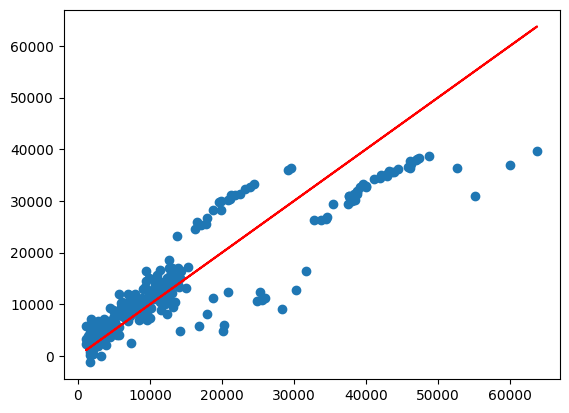

In [181]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')

print('R^2 score:', model.score(X_test, y_test))
print('Coefficients:', model.coef_)
print('Intersept', model.intercept_)

## 2) Classification:

## 1 step: read the data, analyze and clean it (info, null values, duplicated values, map)
## 2 step: choose the target (y) and the features (X)
## 3 step: split the data on a test and train set
## 4 step: set a model
## 5 step: rate the quality (confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score)

In [192]:
# classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [183]:
df = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/wine.csv', encoding='latin-1')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [185]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [201]:
y = df['Wine']
X = df.drop('Wine', axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

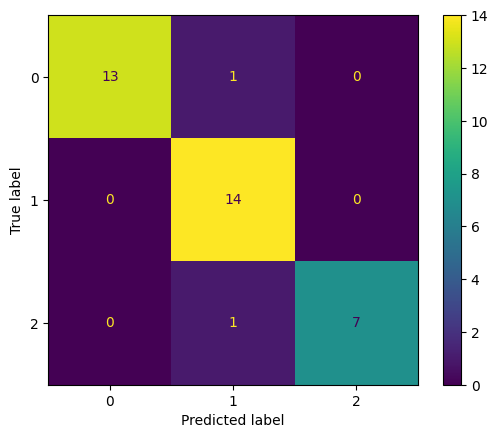

In [202]:
cm = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [203]:
accuracy = model.score(X_test1, y_test1)
print('Accuracy:', accuracy)

Accuracy: 0.9444444444444444


In [189]:
# scores = model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, scores)
# area = roc_auc_score(y_test, scores)
# plt.plot(fpr, tpr, label=f'result: {area}')
# plt.legend()

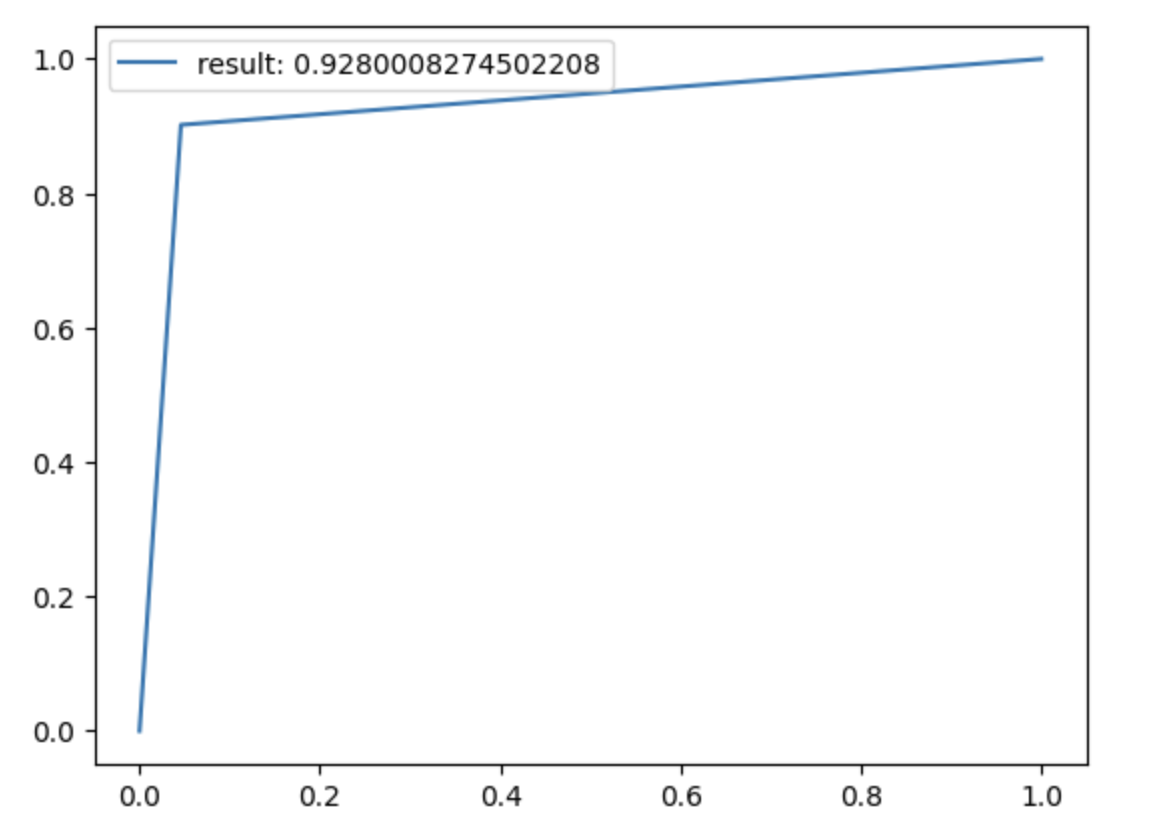

## 3) Classtering:

## 1 step: read the data, analyze and clean it (info, null values, duplicated values, map)
## 2 step: choose the features
## 3 step: set a algorithm (KMeans)
## 4 step: rate the quality (Silhouette score)

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [254]:
table = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/Mall_Customers.csv', encoding='latin-1')
table.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [255]:
table.drop(['CustomerID', 'Age'], axis=1, inplace=True)
table

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40
...,...,...,...
195,Female,120,79
196,Female,126,28
197,Male,126,74
198,Male,137,18


In [256]:
X = table[['Annual Income (k$)', 'Spending Score (1-100)']]
model = KMeans(n_clusters=5)
model.fit(X)
colors = model.fit_predict(X)

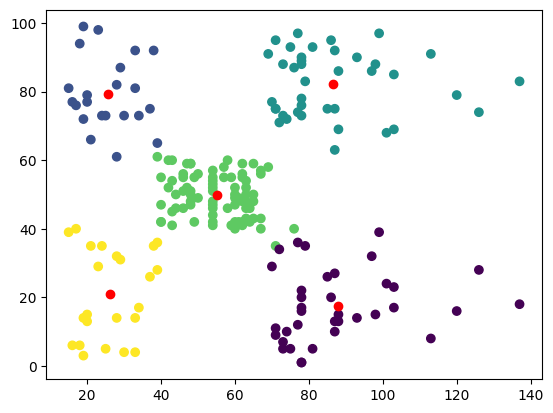

In [257]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=colors)
plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], c='red')

In [273]:
model2 = AgglomerativeClustering(n_clusters=5)
model2.fit_predict(X)
score = silhouette_score(X, model2.labels_)
print(score)


TypeError: 'numpy.float64' object is not callable